# Econ 570: Assignment 2 Wenbo Wang
DGP1. Simulate a DGP where the outcome of interest depends on a randomly assigned treatment and some observed covariates. How does your estimate of the treatment effect parameter compare in the following two cases:
a. You do not control for any covariates
b. You control for all the covariates that affect the outcome

In [75]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import graphviz as gr
import random
import math
from tqdm import tqdm
import graphviz as gr
import statsmodels.formula.api as smf
path = 'C:/Users/florida/Desktop/Econ570A2'

b. You control for all the covariates that affect the outcome

Given an example model as follows:
Y=c+aT+0.5X1+0.6X2+0.1X3+err,
in which we can let Y, for example, be the stock price crash risk, let Xn be the n factors that may influence Y（Here we only present 3 factors to explain）,c is the intercept, T symbolizes treatment and a is the treatment effect（Here treatment effect is defined as 0.5）,err is the residual. We define the treatment experiment as whether institutions heavily hold the stock share. 0.5,0.6,0.1 are the initial coefficients that we assume.
First of all, we collect 100 trading days of a certain stock and Xn so there are 100 observations.The data are all generated randomly.

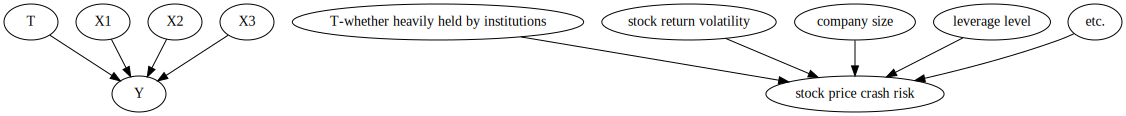

In [76]:
g = gr.Digraph()
g.edge("T", "Y")
g.edge("X1", "Y")
g.edge("X2", "Y")
g.edge("X3", "Y")

g.edge("T-whether heavily held by institutions", "stock price crash risk")
g.edge("stock return volatility", "stock price crash risk")
g.edge("company size", "stock price crash risk")
g.edge("leverage level", "stock price crash risk")
g.edge("etc.", "stock price crash risk")

g

[1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0
 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1]
[  3.10178657 -36.46963356  -9.53537492 -47.54288139  10.58600998
  23.02345195  42.49687595  53.22129561 -14.08287317  -7.92771433
 -17.71669763 -10.16382939 -27.61504493 -19.30784281 -44.62031204
 -18.99907778  12.8807853   40.28431518  38.44748129   8.44083792
 -42.63192989 -33.52540184  32.31597882  39.94420604  20.16228968
  35.4673218   18.4867543   24.27933383   8.71564951  14.63896247
  24.36564554  23.85169998  33.70594374  13.76732587  38.57427913
 -10.56524152  21.90183897 -16.7598769  -31.62828255 -30.69837632
 -48.73820577 -18.82150535 -22.40479063  13.62256499 -22.94436383
  17.47528703  24.24928223  -4.6345336  -24.84846163  20.5363559
 -47.51401616  25.42780148  22.52100132 -46.81799743 -19.0518741
  -8.43788248   3.90309463 -10.92506982   9.46376431   0.17441154
  10.0

(array([ 5.,  3.,  8., 10., 16., 18., 14., 12.,  7.,  7.]),
 array([-56.49633902, -45.35770865, -34.21907828, -23.08044791,
        -11.94181754,  -0.80318717,  10.3354432 ,  21.47407356,
         32.61270393,  43.7513343 ,  54.88996467]),
 <BarContainer object of 10 artists>)

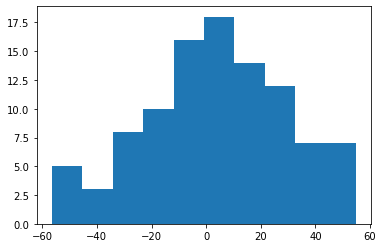

In [77]:
nobs = 100
#The value range of random numbers could be modified
Vol = np.random.randint(100,200,nobs)#stock return volatility
Size = np.random.randint(100,200,nobs)#company size
Lev = np.random.randint(100,200,nobs)#leverage level
#Generate ramdon treatment group and control group
#when T=1,institutions heavily hold the share;when T=0,institutions do not heavily hold the share
T = np.random.randint(2,size=(nobs))
print(T)
CrashRisk = np.random.normal(0.5*T+0.5*Vol-0.6*Size+0.1*Lev).astype(float)
#see the description and distribution of Y
print(CrashRisk)
plt.hist(CrashRisk)

In [78]:
pd.DataFrame(CrashRisk).describe()

,0
count,100.000000
mean,3.182021
std,26.166119
min,-56.496339
25%,-14.752124
50%,5.247244
75%,22.056630
max,54.889965


In [79]:
data = pd.DataFrame(
    {'T':T,
     'Vol':Vol,
     'Size':Size,
     'Lev':Lev,
     'CrashRisk':CrashRisk})
data.to_csv(path+'//'+'1_1_100.csv')
ols_control= smf.ols('CrashRisk~T+Vol+Size+Lev',data = data).fit()
print(ols_control.summary())
MSE = np.square(np.subtract(0.5,ols_control.params[1])).mean()
RMSE = math.sqrt(MSE)
Bias = ols_control.params[1]-0.5
print("RMSE:",RMSE)
print("Bias:",Bias)

                            OLS Regression Results                            
Dep. Variable:              CrashRisk   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.441e+04
Date:                Fri, 15 Apr 2022   Prob (F-statistic):          3.94e-142
Time:                        16:19:08   Log-Likelihood:                -121.02
No. Observations:                 100   AIC:                             252.0
Df Residuals:                      95   BIC:                             265.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4716      0.775     -0.609      0.5

As we can see, when we control all the covariates that affect the outcome, the results of the given example model are:
Bias=0;
RMSE=0;
Treatment Effect=0.5.

In [80]:
#save the result
df = pd.DataFrame([[nobs,Bias,RMSE,ols_control.params[1]]],columns = ['Size','Bias','RMSE',"TE"])

a. You do not control for any covariates

In [81]:
data = pd.DataFrame(
    {'T':T,
     'CrashRisk':CrashRisk})
data.to_csv(path+'//'+'1_2_100.csv')
ols_not_control= smf.ols('CrashRisk~T',data = data).fit()
print(ols_not_control.summary())

                            OLS Regression Results                            
Dep. Variable:              CrashRisk   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.02680
Date:                Fri, 15 Apr 2022   Prob (F-statistic):              0.870
Time:                        16:19:08   Log-Likelihood:                -467.82
No. Observations:                 100   AIC:                             939.6
Df Residuals:                      98   BIC:                             944.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7684      3.647      0.759      0.4

In [82]:
MSE = np.square(np.subtract(0.5,ols_not_control.params[1])).mean()
RMSE = math.sqrt(MSE)
Bias = ols_not_control.params[1]-0.5
print("RMSE:",RMSE)
print("Bias:",Bias)

RMSE: 0.3617163522646518
Bias: 0.3617163522646518


In [83]:
df2 = pd.DataFrame([[nobs,Bias,RMSE,ols_not_control.params[1]]],columns = ['Size','Bias','RMSE',"TE"])
df = df.append(df2,ignore_index=True)
print(df)

   Size      Bias      RMSE        TE
0   100  0.174037  0.174037  0.674037
1   100  0.361716  0.361716  0.861716


Expand sample size to 1000 instead and go through the same process.

                            OLS Regression Results                            
Dep. Variable:              CrashRisk   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.264e+05
Date:                Fri, 15 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:19:09   Log-Likelihood:                -1412.4
No. Observations:                1000   AIC:                             2835.
Df Residuals:                     995   BIC:                             2859.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3344      0.293      1.140      0.2

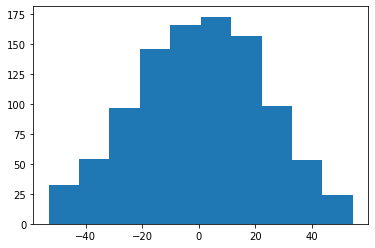

In [84]:
nobs = 1000
#The value range of random numbers could be modified
Vol = np.random.randint(100,200,nobs)
Size = np.random.randint(100,200,nobs)
Lev = np.random.randint(100,200,nobs)
#Generate ramdon treatment group and control group
T = np.random.randint(2,size=(nobs))
CrashRisk=np.random.normal(0.5*T+0.5*Vol-0.6*Size+0.1*Lev).astype(float)
#see the description and distribution of Y
plt.hist(CrashRisk)
pd.DataFrame(CrashRisk).describe()
data = pd.DataFrame(
    {'T':T,
     'Vol':Vol,
     'Size':Size,
     'Lev':Lev,
     'CrashRisk':CrashRisk})
data.to_csv(path+'//'+'1_1_1000.csv')
#control covriants
ols_control= smf.ols('CrashRisk~T+Vol+Size+Lev',data = data).fit()
print(ols_control.summary())
MSE = np.square(np.subtract(0.5,ols_control.params[1])).mean()
RMSE = math.sqrt(MSE)
Bias = ols_control.params[1]-0.5
print("RMSE:",RMSE)
print("Bias:",Bias)
df2 = pd.DataFrame([[nobs,Bias,RMSE,ols_control.params[1]]],columns = ['Size','Bias','RMSE',"TE"])
df = df.append(df2,ignore_index=True)
#not control
data = pd.DataFrame(
    {'T':T,
     'CrashRisk':CrashRisk})
data.to_csv(path+'//'+'1_2_1000.csv')
ols_not_control= smf.ols('CrashRisk~T',data = data).fit()
print(ols_not_control.summary())
MSE = np.square(np.subtract(0.5,ols_not_control.params[1])).mean()
RMSE = math.sqrt(MSE)
Bias = ols_not_control.params[1]-0.5
print(ols_not_control.params[1])
print("RMSE:",RMSE)
print("Bias:",Bias)
df2 = pd.DataFrame([[nobs,Bias,RMSE,ols_not_control.params[1]]],columns = ['Size','Bias','RMSE',"TE"])
df=df.append(df2,ignore_index=True)
df.rename({0:'control'},inplace=True)
df.rename({1:'not_control'},inplace=True)
df.rename({2:'control'},inplace=True)
df.rename({3:'not_control'},inplace=True)
print(df)

As we can see from the table,both Bias and RMSE shrink as sample size becomes larger and covariates are controlled.
After controlling all the covariates and collect suffient sample data,the results are more accurate and meaningful.However,the below zero Treatment Effect and large Bias shows wearing cannot truely prove the cause-effect relationship in the model.In the real-life situation given in the stock example, it can only show that there is a significant correlation between institutional heavy holdings and the risk of stock price collapse, but can not strictly prove that there is a cause-effect relationship between them.

Monte Carlo simulation and visualization：
We've only discussed 2 kinds of certain sample size previously,here we use Monte Carlo simulation to explore more information.

100%|███████████████████████████████████████████████████████████████████████████████| 495/495 [00:04<00:00, 106.72it/s]


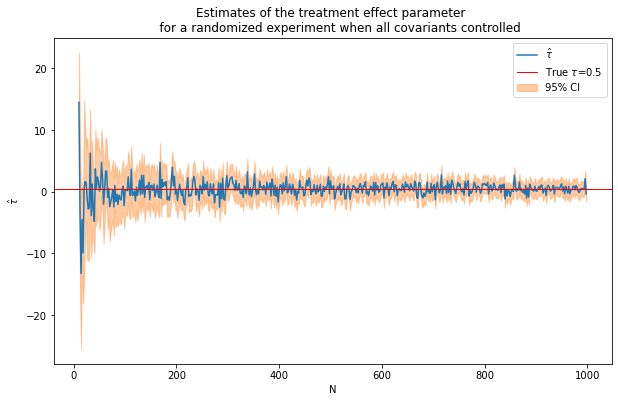

In [85]:
def simulate_data(a,b,c,d,nobs):
    
    Vol = np.random.randint(100,200,nobs)#stock return volatility
    Size = np.random.randint(100,200,nobs)#company size
    Lev = np.random.randint(100,200,nobs)#leverage level
    T = np.random.randint(2,size=(nobs))
    X = pd.concat([pd.DataFrame(T),pd.DataFrame(Vol),pd.DataFrame(Size),pd.DataFrame(Lev)],axis=1,ignore_index=True)
    e = np.random.normal(0,10,nobs)
    Y = a*T+b*Vol+c*Size+d*Lev+e
    return (Y,X)
    
def run_mc_simulation(a,b,c,d,nobs,n_rep):
    n_values = []
    tauhats = []
    sehats = []
    lb = []
    ub = []
    data=[]
    for nobs in tqdm(n_rep):
        n_values = n_values + [nobs]
        Y,X = simulate_data(a,b,c,d,nobs)
        data1 = pd.concat([pd.DataFrame(Y),X],axis=1)
        data = pd.concat([data1,pd.DataFrame(data)],axis=0)
        data1=[]
        mod = sm.OLS(Y,sm.add_constant(X))
        res = mod.fit()
        tauhat = res.params[0]
        se_tauhat = res.HC1_se[0]
        tauhats = tauhats + [tauhat]
        sehats = sehats + [se_tauhat]    
        lb = lb + [tauhat-1.96*se_tauhat]
        ub = ub + [tauhat+1.96*se_tauhat]
    data.to_csv(path+'//'+'mt_1_control_variants.csv')
    return (n_values,tauhats,sehats,lb,ub)
    
def plot_parameter_estimates(n_values,tauhats,tau,lb,ub,caption):
    fig = plt.figure(figsize = (10,6))
    plt.plot(n_values,tauhats,label ='$\hat{\\tau}$')
    plt.xlabel('N')
    plt.ylabel('$\hat{\\tau}$')
    plt.axhline(y=tau, color='r', linestyle='-',linewidth=1,
            label='True $\\tau$={}'.format(tau))
    plt.title('{}'.format(caption))
    plt.fill_between(n_values, lb, ub,
        alpha=0.5, edgecolor='#FF9848', facecolor='#FF9848',label = '95% CI')
    plt.legend()

caption = """Estimates of the treatment effect parameter 
    for a randomized experiment when all covariants controlled"""
#initial params
a=0.5 #tau=0.5
b=0.5
c=-0.6
d=0.1
n_rep = range(10,1000,2) # loop over N values
(n_values,tauhats,sehats,lb,ub) = run_mc_simulation(a,b,c,d,nobs,n_rep)
plot_parameter_estimates(n_values,tauhats,a,lb,ub,caption)

The graph illustrates that as we loop over N values, the bias shrinks.

DGP2.Simulate a DGP with a confounder (common cause)
a. You fail to control for the confounder
b. You do control for the confounder

From the example of stock price collapse risk discussed above, although in theory we believe that institutional investors' heavy holdings of a stock may exacerbate the stock price collapse, there may be some missing factors that commonly affect these two variables. For example, the profitability of a listed company will not only determine whether the institution is heavily invested in it, but also affect the collapse risk of its stock price itself. We guess that the stronger the profitability is, the more willing the institution is to hold heavy positions; At the same time, the stronger the profitability, the less likely the stock price crash may be; However, the larger the proportion of heavy positions held by institutions, the risk of stock price collapse may increase or decrease.

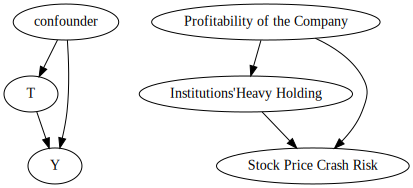

In [86]:
g = gr.Digraph()

g.edge("confounder", "T")
g.edge("confounder", "Y")
g.edge("T", "Y")

g.edge("Profitability of the Company", "Institutions'Heavy Holding")
g.edge("Profitability of the Company", "Stock Price Crash Risk")
g.edge("Institutions'Heavy Holding", "Stock Price Crash Risk")

g

a. You fail to control for the confounder
In this case, the treatment is independent.

In [87]:
#do not take the confounder profitability into consideration
nobs=100
T = np.random.randint(2,size=(nobs))
Vol = np.random.randint(100,200,nobs)
Size = np.random.randint(100,200,nobs)
Lev = np.random.randint(100,200,nobs)
CrashRisk = np.random.normal(0.5*T+0.5*Vol-0.6*Size+0.1*Lev).astype(float)
pd.DataFrame(CrashRisk).describe()
data = pd.DataFrame(
    {'T':T,
     'Vol':Vol,
     'Size':Size,
     'Lev':Lev,
     'CrashRisk':CrashRisk})
data.to_csv(path+'//'+'2_1_100.csv')
ols_not_control= smf.ols('CrashRisk~T+Vol+Size+Lev',data = data).fit()
print(ols_not_control.summary())
MSE = np.square(np.subtract(0.5,ols_not_control.params[1])).mean()
RMSE = math.sqrt(MSE)
Bias = ols_not_control.params[1]-0.5
print(ols_not_control.params[1])
print("RMSE:",RMSE)
print("Bias:",Bias)
df = pd.DataFrame([[nobs,Bias,RMSE,ols_not_control.params[1],ols_not_control.pvalues[1]]],columns = ['Size','Bias','RMSE',"TE","T_pvalue"])

                            OLS Regression Results                            
Dep. Variable:              CrashRisk   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.882e+04
Date:                Fri, 15 Apr 2022   Prob (F-statistic):          9.15e-137
Time:                        16:19:16   Log-Likelihood:                -137.68
No. Observations:                 100   AIC:                             285.4
Df Residuals:                      95   BIC:                             298.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5699      0.957      0.596      0.5

b. You do control for the confounder

In [88]:
#Whether the institution heavily hold the company is a function of the company's profitability
Prof=np.random.randint(1,100,nobs)
#the more probitable, the higher possibility of institutional heavy holds
#T(conf)：when conf>50,T=1;when conf<50,T=0
T = np.random.randint(2,size=(nobs))+0.01*Prof
data = pd.DataFrame(
    {'T':T,
     'Conf':Prof,
     'Vol':Vol,
     'Size':Size,
     'Lev':Lev,
     'CrashRisk':CrashRisk})
data.to_csv(path+'//'+'2_2_100.csv')
ols_control= smf.ols('CrashRisk~T+Conf+Vol+Size+Lev',data = data).fit()
print(ols_control.summary())
MSE = np.square(np.subtract(0.5,ols_control.params[1])).mean()
RMSE = math.sqrt(MSE)
Bias = ols_control.params[1]-0.5
print(ols_control.params[1])
print("RMSE:",RMSE)
print("Bias:",Bias)
df2 = pd.DataFrame([[nobs,Bias,RMSE,ols_control.params[1],ols_control.pvalues[1]]],columns = ['Size','Bias','RMSE',"TE","T_pvalue"])
df = df.append(df2,ignore_index=True)
print(df)

                            OLS Regression Results                            
Dep. Variable:              CrashRisk   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.466e+04
Date:                Fri, 15 Apr 2022   Prob (F-statistic):          2.87e-134
Time:                        16:19:16   Log-Likelihood:                -138.49
No. Observations:                 100   AIC:                             289.0
Df Residuals:                      94   BIC:                             304.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8660      0.974      0.889      0.3

Now expand our sample size to 1000 and repeat procedures above.

In [89]:
nobs=1000
#a.do not control
T = np.random.randint(2,size=(nobs))
Vol = np.random.randint(100,200,nobs)
Size = np.random.randint(100,200,nobs)
Lev = np.random.randint(100,200,nobs)
CrashRisk = np.random.normal(0.5*T+0.5*Vol-0.6*Size+0.1*Lev).astype(float)
pd.DataFrame(CrashRisk).describe()
data = pd.DataFrame(
    {'T':T,
     'Vol':Vol,
     'Size':Size,
     'Lev':Lev,
     'CrashRisk':CrashRisk})
data.to_csv(path+'//'+'2_1_1000.csv')
ols_not_control= smf.ols('CrashRisk~T+Vol+Size+Lev',data = data).fit()
print(ols_not_control.summary())
MSE = np.square(np.subtract(0.5,ols_not_control.params[1])).mean()
RMSE = math.sqrt(MSE)
Bias = ols_not_control.params[1]-0.5
print(ols_not_control.params[1])
print("RMSE:",RMSE)
print("Bias:",Bias)
df2 = pd.DataFrame([[nobs,Bias,RMSE,ols_not_control.params[1],ols_not_control.pvalues[1]]],columns = ['Size','Bias','RMSE',"TE","T_pvalue"])
df = df.append(df2,ignore_index=True)
#b.control
Prof=np.random.randint(1,100,nobs)
T = 0.01*np.random.randint(2,size=(nobs))*Prof
data = pd.DataFrame(
    {'T':T,
     'Conf':Prof,
     'Vol':Vol,
     'Size':Size,
     'Lev':Lev,
     'CrashRisk':CrashRisk})
data.to_csv(path+'//'+'2_2_1000.csv')
ols_control= smf.ols('CrashRisk~T+Conf+Vol+Size+Lev',data = data).fit()
print(ols_control.summary())
MSE = np.square(np.subtract(0.5,ols_control.params[1])).mean()
RMSE = math.sqrt(MSE)
Bias = ols_control.params[1]-0.5
print(ols_control.params[1])
print("RMSE:",RMSE)
print("Bias:",Bias)
df2 = pd.DataFrame([[nobs,Bias,RMSE,ols_control.params[1],ols_control.pvalues[1]]],columns = ['Size','Bias','RMSE',"TE","T_pvalue"])
df = df.append(df2,ignore_index=True)
df.rename({0:'not_control'},inplace=True)
df.rename({1:'control'},inplace=True)
df.rename({2:'not_control'},inplace=True)
df.rename({3:'control'},inplace=True)
print(df)

                            OLS Regression Results                            
Dep. Variable:              CrashRisk   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.099e+05
Date:                Fri, 15 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:19:16   Log-Likelihood:                -1465.1
No. Observations:                1000   AIC:                             2940.
Df Residuals:                     995   BIC:                             2965.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6766      0.284     -2.381      0.0

As we can see from the result, Bias, RMSE and TE decrease after controlling confounder. So when the height itself does not meet the conditions for wearing high heels (the person is too high), the bias is still not eliminated. It means that when we do not control it, the OLS result is not reliable. When the sample size expand from 100 to 1000, the TE also increases,meaning that expanding sample size is considerable. 

Monte Carlo simulation and visualization：

100%|████████████████████████████████████████████████████████████████████████████████| 495/495 [00:05<00:00, 90.84it/s]


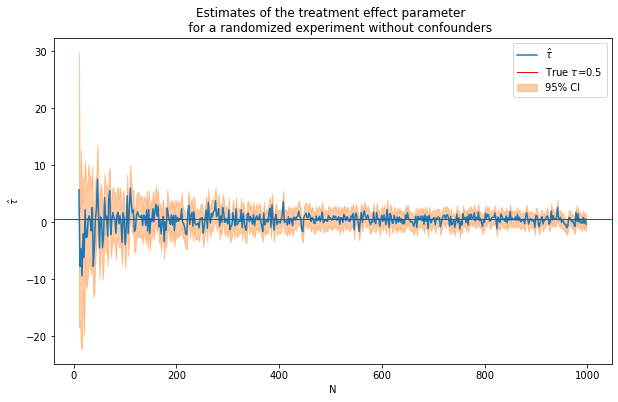

In [90]:
def simulate_data(a,b,c,d,nobs):
    T = np.random.randint(2,size=(nobs))
    Vol = np.random.randint(100,200,nobs)#stock return volatility
    Size = np.random.randint(100,200,nobs)#company size
    Lev = np.random.randint(100,200,nobs)#leverage level
    X = pd.concat([pd.DataFrame(T),pd.DataFrame(Vol),pd.DataFrame(Size),pd.DataFrame(Lev)],axis=1,ignore_index=True)
    e = np.random.normal(0,10,nobs)
    Y = a*T+b*Vol+c*Size+d*Lev+e
    return (Y,X)
def run_mc_simulation(a,b,c,d,nobs,n_rep):
    n_values = []
    tauhats = []
    sehats = []
    lb = []
    ub = []
    data=[]
    for nobs in tqdm(n_rep):
        n_values = n_values + [nobs]
        Y,X = simulate_data(a,b,c,d,nobs)
        data1 = pd.concat([pd.DataFrame(Y),X],axis=1)
        data = pd.concat([data1,pd.DataFrame(data)],axis=0)
        data1=[]
        mod = sm.OLS(Y,sm.add_constant(X))
        res = mod.fit()
        tauhat = res.params[0]
        se_tauhat = res.HC1_se[0]
        tauhats = tauhats + [tauhat]
        sehats = sehats + [se_tauhat]    
        lb = lb + [tauhat-1.96*se_tauhat]
        ub = ub + [tauhat+1.96*se_tauhat]
    data.to_csv(path+'//'+'mt_2_no_confounder.csv')
    return (n_values,tauhats,sehats,lb,ub)
caption = """Estimates of the treatment effect parameter 
    for a randomized experiment without confounders"""
#initial params
a=0.5 #tau=0.5
b=0.5
c=-0.6
d=0.1

n_rep = range(10,1000,2) # loop over N values
(n_values,tauhats,sehats,lb,ub) = run_mc_simulation(a,b,c,d,nobs,n_rep)
plot_parameter_estimates(n_values,tauhats,a,lb,ub,caption)

100%|████████████████████████████████████████████████████████████████████████████████| 495/495 [00:07<00:00, 63.16it/s]


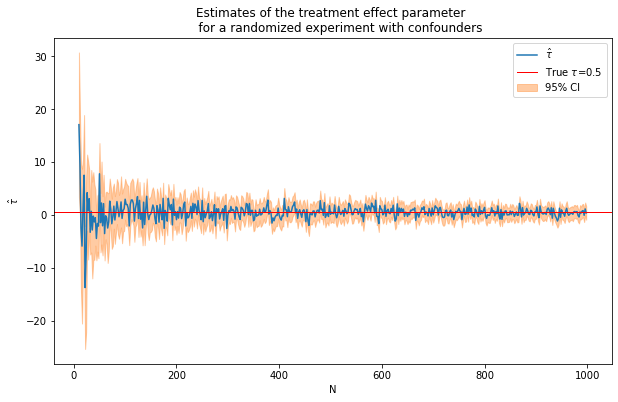

In [91]:
def simulate_data(a,b,c,d,nobs):
    Prof=np.random.randint(1,100,nobs)
    T = np.random.randint(2,size=(nobs))+0.01*Prof
    Vol = np.random.randint(100,200,nobs)#stock return volatility
    Size = np.random.randint(100,200,nobs)#company size
    Lev = np.random.randint(100,200,nobs)#leverage level
    X = pd.concat([pd.DataFrame(T),pd.DataFrame(Prof),pd.DataFrame(Vol),pd.DataFrame(Size),pd.DataFrame(Lev)],axis=1,ignore_index=True)
    e = np.random.normal(0,10,nobs)
    Y = a*T+Prof+b*Vol+c*Size+d*Lev+e
    return (Y,X)
def run_mc_simulation(a,b,c,d,nobs,n_rep):
    n_values = []
    tauhats = []
    sehats = []
    lb = []
    ub = []
    data=[]
    for nobs in tqdm(n_rep):
        n_values = n_values + [nobs]
        Y,X = simulate_data(a,b,c,d,nobs)
        data1 = pd.concat([pd.DataFrame(Y),X],axis=1)
        data = pd.concat([data1,pd.DataFrame(data)],axis=0)
        data1=[]
        mod = sm.OLS(Y,sm.add_constant(X))
        res = mod.fit()
        tauhat = res.params[0]
        se_tauhat = res.HC1_se[0]
        tauhats = tauhats + [tauhat]
        sehats = sehats + [se_tauhat]    
        lb = lb + [tauhat-1.96*se_tauhat]
        ub = ub + [tauhat+1.96*se_tauhat]
    data.to_csv(path+'//'+'mt_2_confounder.csv')
    return (n_values,tauhats,sehats,lb,ub)
caption = """Estimates of the treatment effect parameter 
    for a randomized experiment with confounders"""
#initial params
a=0.5 #tau=0.5
b=0.5
c=-0.6
d=0.1

n_rep = range(10,1000,2) # loop over N values
(n_values,tauhats,sehats,lb,ub) = run_mc_simulation(a,b,c,d,nobs,n_rep)
plot_parameter_estimates(n_values,tauhats,a,lb,ub,caption)

DGP3. Simulate a DGP with selection bias into the treatment (variable in between the path from the
treatment to the outcome)
a. You control for the variable in between the path from cause to effect
b. You do not control for the variable in between the path from cause to effect

Some studies have shown that there is a certain selection bias between institutional investors' heavy holdings and stock price collapse risk. Specifically, institutional investors' heavy holdings may have a supervisory and governance effect on the company, so as to improve the transparency of financial earnings information of listed companies. With the improvement of the transparency of the company's financial information, the stock is more likely to be reasonably priced, so the risk of stock price collapse is reduced.

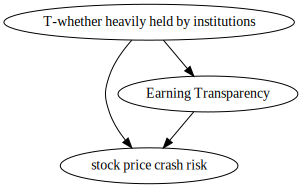

In [92]:
g = gr.Digraph()

g.edge("T-whether heavily held by institutions", "stock price crash risk")
g.edge("T-whether heavily held by institutions", "Earning Transparency")
g.edge("Earning Transparency", "stock price crash risk")

g

a. You do not control for the variable in between the path from cause to effect

when sample_size=100：

In [93]:
nobs=100
T = np.random.randint(2,size=(nobs))
Vol = np.random.randint(100,200,nobs)
Size = np.random.randint(100,200,nobs)
Lev = np.random.randint(100,200,nobs)
CrashRisk = np.random.normal(0.5*T+0.5*Vol-0.6*Size+0.1*Lev).astype(float)
pd.DataFrame(CrashRisk).describe()
data = pd.DataFrame(
    {'T':T,
     'Vol':Vol,
     'Size':Size,
     'Lev':Lev,
     'CrashRisk':CrashRisk})
data.to_csv(path+'//'+'3_1_100.csv')
ols_control= smf.ols('CrashRisk~T+Vol+Size+Lev',data = data).fit()
print(ols_not_control.summary())
MSE = np.square(np.subtract(0.5,ols_not_control.params[1])).mean()
RMSE = math.sqrt(MSE)
Bias = ols_not_control.params[1]-0.5
print(ols_not_control.params[1])
print("RMSE:",RMSE)
print("Bias:",Bias)
df = pd.DataFrame([[nobs,Bias,RMSE,ols_not_control.params[1],ols_not_control.pvalues[1]]],columns = ['Size','Bias','RMSE',"TE","T_pvalue"])
print(df)

                            OLS Regression Results                            
Dep. Variable:              CrashRisk   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.099e+05
Date:                Fri, 15 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:19:34   Log-Likelihood:                -1465.1
No. Observations:                1000   AIC:                             2940.
Df Residuals:                     995   BIC:                             2965.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6766      0.284     -2.381      0.0

b. You control for the variable in between the path from cause to effect

Let earning transparency be the mediator(noted M).

In [94]:
M = (np.random.normal(0.8*Vol-0.3*Size,2)).astype(float)*T
data = pd.DataFrame(
    {'T':T,
     'M':M,
     'Vol':Vol,
     'Size':Size,
     'Lev':Lev,
     'CrashRisk':CrashRisk})
data.to_csv(path+'//'+'3_2_100.csv')
ols_control= smf.ols('CrashRisk~T+M+Vol+Size+Lev',data = data).fit()
print(ols_control.summary())
MSE = np.square(np.subtract(0.5,ols_control.params[1])).mean()
RMSE = math.sqrt(MSE)
Bias = ols_control.params[1]-0.5
print(ols_control.params[1])
print("RMSE:",RMSE)
print("Bias:",Bias)
df2 = pd.DataFrame([[nobs,Bias,RMSE,ols_control.params[1],ols_control.pvalues[1]]],columns = ['Size','Bias','RMSE',"TE","T_pvalue"])
df = df.append(df2,ignore_index=True)
print(df)

                            OLS Regression Results                            
Dep. Variable:              CrashRisk   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     8824.
Date:                Fri, 15 Apr 2022   Prob (F-statistic):          6.26e-124
Time:                        16:19:35   Log-Likelihood:                -144.99
No. Observations:                 100   AIC:                             302.0
Df Residuals:                      94   BIC:                             317.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6349      0.936     -0.678      0.4

when sample_size=1000,again we have:

In [95]:
nobs=1000
#not control
T = np.random.randint(2,size=(nobs))
Vol = np.random.randint(100,200,nobs)
Size = np.random.randint(100,200,nobs)
Lev = np.random.randint(100,200,nobs)
CrashRisk = np.random.normal(0.5*T+0.5*Vol-0.6*Size+0.1*Lev).astype(float)
pd.DataFrame(CrashRisk).describe()
data = pd.DataFrame(
    {'T':T,
     'Vol':Vol,
     'Size':Size,
     'Lev':Lev,
     'CrashRisk':CrashRisk})
data.to_csv(path+'//'+'3_1_1000.csv')
ols_control= smf.ols('CrashRisk~T+Vol+Size+Lev',data = data).fit()
print(ols_not_control.summary())
MSE = np.square(np.subtract(0.5,ols_not_control.params[1])).mean()
RMSE = math.sqrt(MSE)
Bias = ols_not_control.params[1]-0.5
print(ols_not_control.params[1])
print("RMSE:",RMSE)
print("Bias:",Bias)
df2 = pd.DataFrame([[nobs,Bias,RMSE,ols_not_control.params[1],ols_not_control.pvalues[1]]],columns = ['Size','Bias','RMSE',"TE","T_pvalue"])
df = df.append(df2,ignore_index=True)
print(df)
#control
M = (np.random.normal(0.8*Vol-0.3*Size,2)).astype(float)*T
data = pd.DataFrame(
    {'T':T,
     'M':M,
     'Vol':Vol,
     'Size':Size,
     'Lev':Lev,
     'CrashRisk':CrashRisk})
data.to_csv(path+'//'+'3_2_1000.csv')
ols_control= smf.ols('CrashRisk~T+M+Vol+Size+Lev',data = data).fit()
print(ols_control.summary())
MSE = np.square(np.subtract(0.5,ols_control.params[1])).mean()
RMSE = math.sqrt(MSE)
Bias = ols_control.params[1]-0.5
print(ols_control.params[1])
print("RMSE:",RMSE)
print("Bias:",Bias)
df2 = pd.DataFrame([[nobs,Bias,RMSE,ols_control.params[1],ols_control.pvalues[1]]],columns = ['Size','Bias','RMSE',"TE","T_pvalue"])
df = df.append(df2,ignore_index=True)
df.rename({0:'not_control'},inplace=True)
df.rename({1:'control'},inplace=True)
df.rename({2:'not_control'},inplace=True)
df.rename({3:'control'},inplace=True)
print(df)

                            OLS Regression Results                            
Dep. Variable:              CrashRisk   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.099e+05
Date:                Fri, 15 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:19:35   Log-Likelihood:                -1465.1
No. Observations:                1000   AIC:                             2940.
Df Residuals:                     995   BIC:                             2965.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6766      0.284     -2.381      0.0

As we see from the result,after adding the mediator,treatment effect becomes less significant for the existance of selection bias. In our case, it means that institutional investors themselves are more prone to hold large amount of shares on the companies that are more transparent on financial status.Therefore, whether institutional investors hold the stock becomes less important.

Monte Carlo simulation and visualization：

100%|████████████████████████████████████████████████████████████████████████████████| 495/495 [00:05<00:00, 92.14it/s]


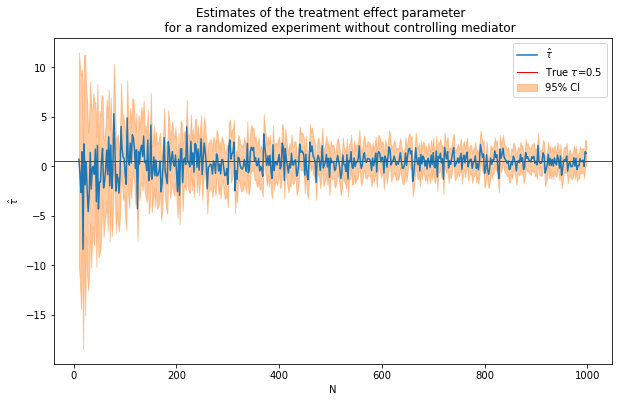

In [96]:
def simulate_data(a,b,c,d,nobs):
    T = np.random.randint(2,size=(nobs))
    Vol = np.random.randint(100,200,nobs)#stock return volatility
    Size = np.random.randint(100,200,nobs)#company size
    Lev = np.random.randint(100,200,nobs)#leverage level
    X = pd.concat([pd.DataFrame(T),pd.DataFrame(Vol),pd.DataFrame(Size),pd.DataFrame(Lev)],axis=1,ignore_index=True)
    e = np.random.normal(0,10,nobs)
    Y = a*T+b*Vol+c*Size+d*Lev+e
    return (Y,X)
def run_mc_simulation(a,b,c,d,nobs,n_rep):
    n_values = []
    tauhats = []
    sehats = []
    lb = []
    ub = []
    data=[]
    for nobs in tqdm(n_rep):
        n_values = n_values + [nobs]
        Y,X = simulate_data(a,b,c,d,nobs)
        data1 = pd.concat([pd.DataFrame(Y),X],axis=1)
        data = pd.concat([data1,pd.DataFrame(data)],axis=0)
        data1=[]
        mod = sm.OLS(Y,sm.add_constant(X))
        res = mod.fit()
        tauhat = res.params[0]
        se_tauhat = res.HC1_se[0]
        tauhats = tauhats + [tauhat]
        sehats = sehats + [se_tauhat]    
        lb = lb + [tauhat-1.96*se_tauhat]
        ub = ub + [tauhat+1.96*se_tauhat]
    data.to_csv(path+'//'+'mt_3_no_mediator.csv')
    return (n_values,tauhats,sehats,lb,ub)
caption = """Estimates of the treatment effect parameter 
    for a randomized experiment without controlling mediator"""
#initial params
a=0.5 #tau=0.5
b=0.5
c=-0.6
d=0.1

n_rep = range(10,1000,2) # loop over N values
(n_values,tauhats,sehats,lb,ub) = run_mc_simulation(a,b,c,d,nobs,n_rep)
plot_parameter_estimates(n_values,tauhats,a,lb,ub,caption)

100%|████████████████████████████████████████████████████████████████████████████████| 495/495 [00:13<00:00, 37.96it/s]


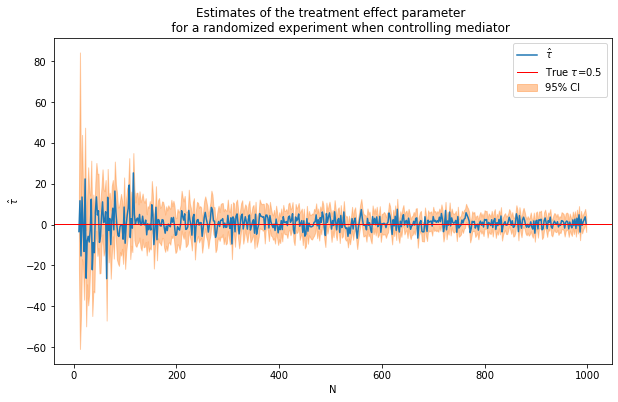

In [97]:
def simulate_data(a,b,c,d,nobs):
    T = np.random.randint(2,size=(nobs))
    Vol = np.random.randint(100,200,nobs)#stock return volatility
    Size = np.random.randint(100,200,nobs)#company size
    Lev = np.random.randint(100,200,nobs)#leverage level
    M = (np.random.normal(0.8*Vol-0.3*Size,2)).astype(float)*T
    X = pd.concat([pd.DataFrame(T),pd.DataFrame(M),pd.DataFrame(Vol),pd.DataFrame(Size),pd.DataFrame(Lev)],axis=1,ignore_index=True)
    e = np.random.normal(0,10,nobs)
    Y = a*T+M+b*Vol+c*Size+d*Lev+e
    return (Y,X)
def run_mc_simulation(a,b,c,d,nobs,n_rep):
    n_values = []
    tauhats = []
    sehats = []
    lb = []
    ub = []
    data=[]
    for nobs in tqdm(n_rep):
        n_values = n_values + [nobs]
        Y,X = simulate_data(a,b,c,d,nobs)
        data1 = pd.concat([pd.DataFrame(Y),X],axis=1)
        data = pd.concat([data1,pd.DataFrame(data)],axis=0)
        data1=[]
        mod = sm.OLS(Y,sm.add_constant(X))
        res = mod.fit()
        tauhat = res.params[0]
        se_tauhat = res.HC1_se[0]
        tauhats = tauhats + [tauhat]
        sehats = sehats + [se_tauhat]    
        lb = lb + [tauhat-1.96*se_tauhat]
        ub = ub + [tauhat+1.96*se_tauhat]
    data.to_csv(path+'//'+'mt_3_mediator.csv')
    return (n_values,tauhats,sehats,lb,ub)
caption = """Estimates of the treatment effect parameter 
    for a randomized experiment when controlling mediator"""
#initial params
a=0.5 #tau=0.5
b=0.5
c=-0.6
d=0.1

n_rep = range(10,1000,2) # loop over N values
(n_values,tauhats,sehats,lb,ub) = run_mc_simulation(a,b,c,d,nobs,n_rep)
plot_parameter_estimates(n_values,tauhats,a,lb,ub,caption)